In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [10]:
from skimage import io, color
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = io.imread(image_path)
    return out

In [7]:
from skimage import feature

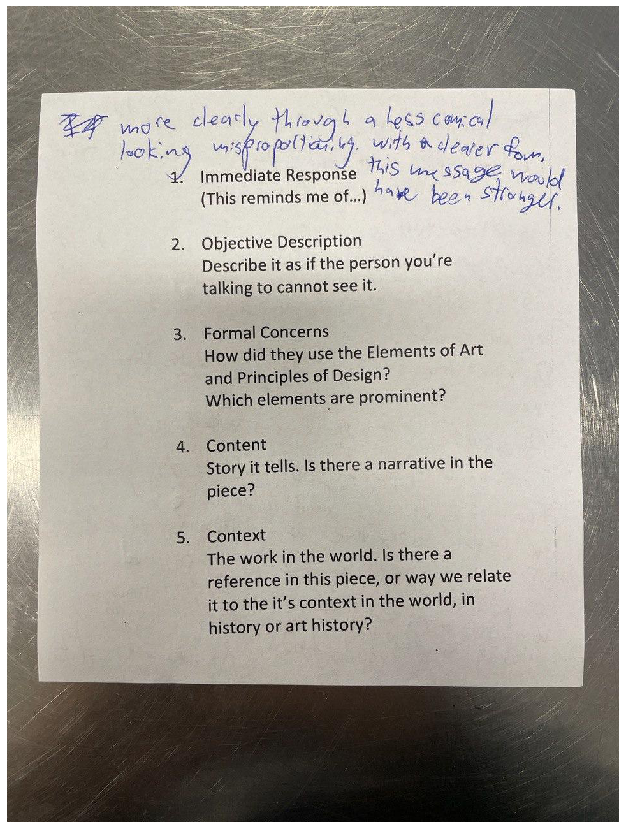

In [28]:
image = load('../FeatureDetection/CornerImages/photo_2021-11-05_11-06-41.jpg')
display(image)

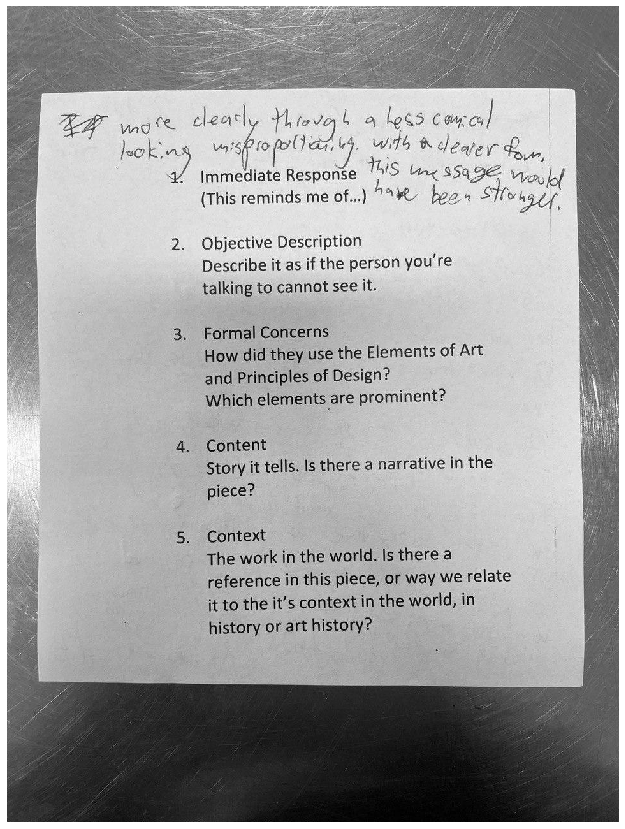

In [18]:
gray_image = color.rgb2gray(image)
display(gray_image)

In [20]:
gray_image = gray_image*255

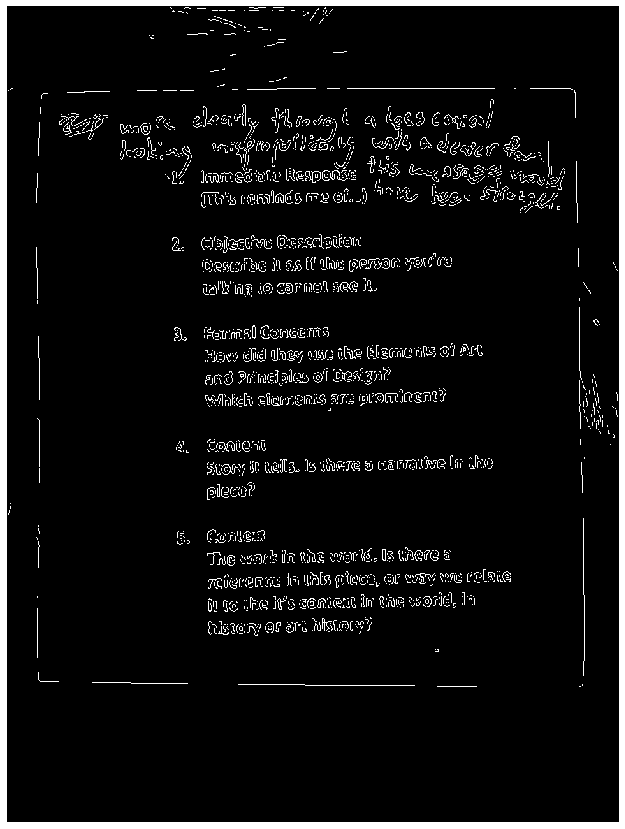

In [26]:
edge_image = feature.canny(gray_image, sigma=2, low_threshold=30, high_threshold=50)
display(edge_image)

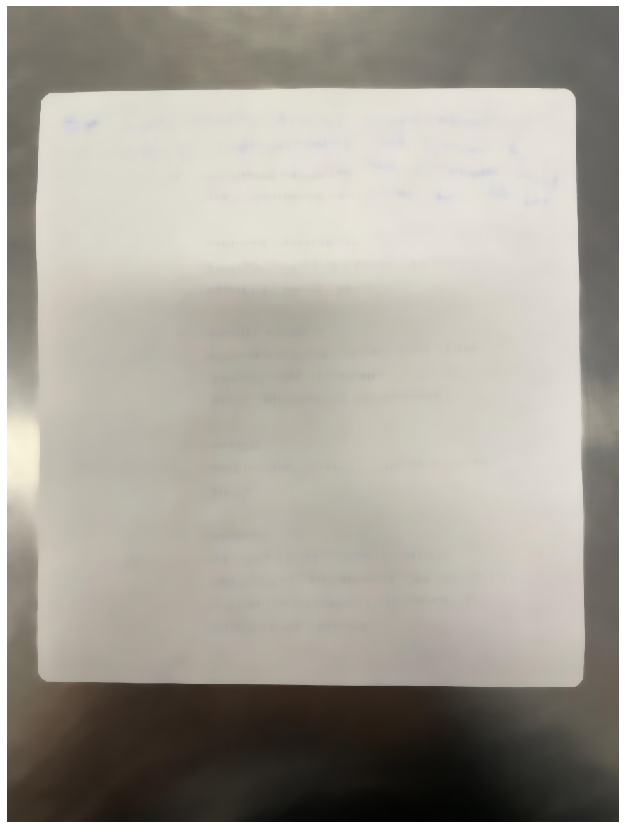

In [120]:
# https://stackoverflow.com/questions/18427031/median-filter-with-python-and-opencv

blurred = cv2.medianBlur(image, 25)
display(blurred)

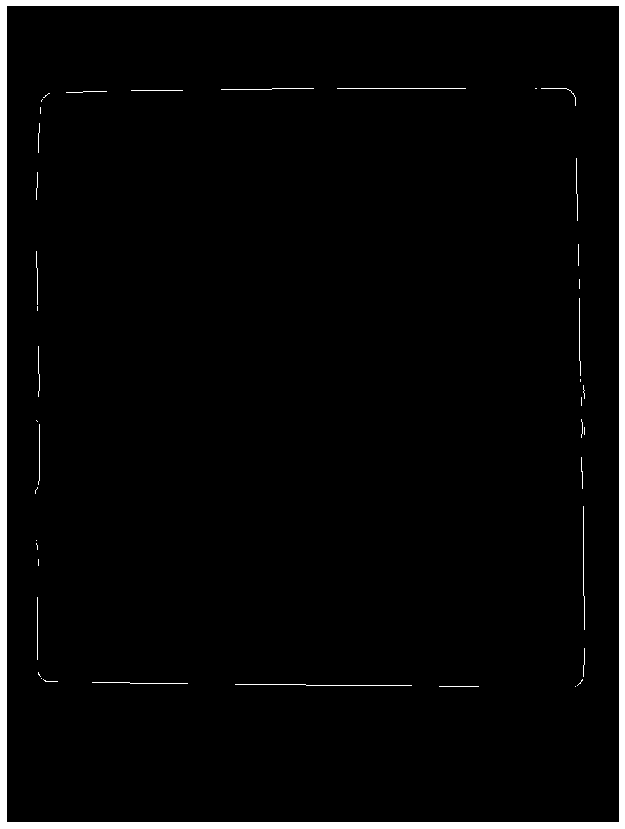

In [100]:
gray_blurred = color.rgb2gray(blurred) * 255
edge_blurred = feature.canny(gray_blurred, sigma=0, low_threshold=20, high_threshold=40)
display(edge_blurred)

In [134]:
thresh = cv2.dilate(np.uint8(edge_blurred),None,iterations = 40)
thresh = cv2.erode(thresh,None,iterations = 40)

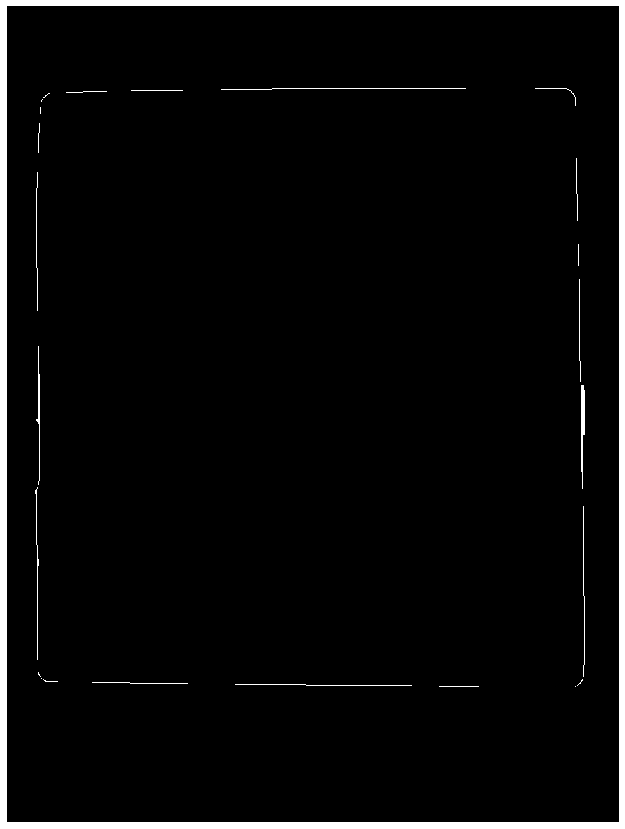

In [137]:
display(thresh)

In [81]:
conts, _ = cv2.findContours(np.uint8(edge_blurred), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

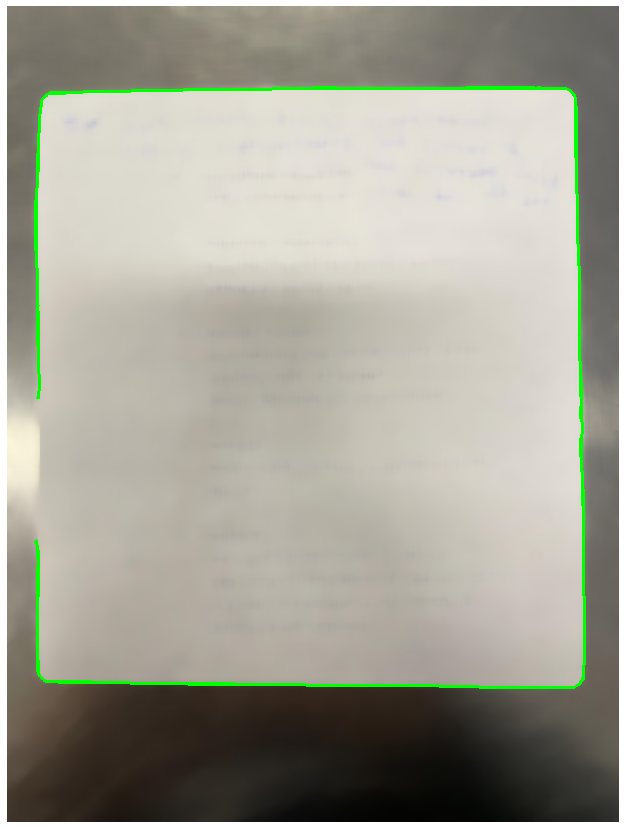

In [124]:
display(cv2.drawContours(blurred, conts, 4, (0,255,0), 3))

In [115]:
epsilon = 0.1*cv2.arcLength(conts[4],True)
approx = cv2.approxPolyDP(conts[4],epsilon,True)

In [116]:
approx

array([[[  61,  139]],

       [[ 898, 1063]]], dtype=int32)

In [109]:
conts[1]

array([[[ 45, 648]],

       [[ 45, 649]],

       [[ 47, 651]],

       [[ 47, 652]],

       [[ 48, 653]],

       [[ 48, 654]],

       [[ 50, 656]],

       [[ 50, 744]],

       [[ 49, 745]],

       [[ 49, 750]],

       [[ 48, 751]],

       [[ 48, 753]],

       [[ 47, 754]],

       [[ 47, 756]],

       [[ 46, 757]],

       [[ 46, 758]],

       [[ 44, 760]],

       [[ 44, 764]],

       [[ 44, 760]],

       [[ 46, 758]],

       [[ 46, 757]],

       [[ 47, 756]],

       [[ 47, 755]],

       [[ 48, 754]],

       [[ 48, 751]],

       [[ 49, 750]],

       [[ 49, 745]],

       [[ 50, 744]],

       [[ 50, 656]],

       [[ 48, 654]],

       [[ 48, 652]],

       [[ 45, 649]]], dtype=int32)

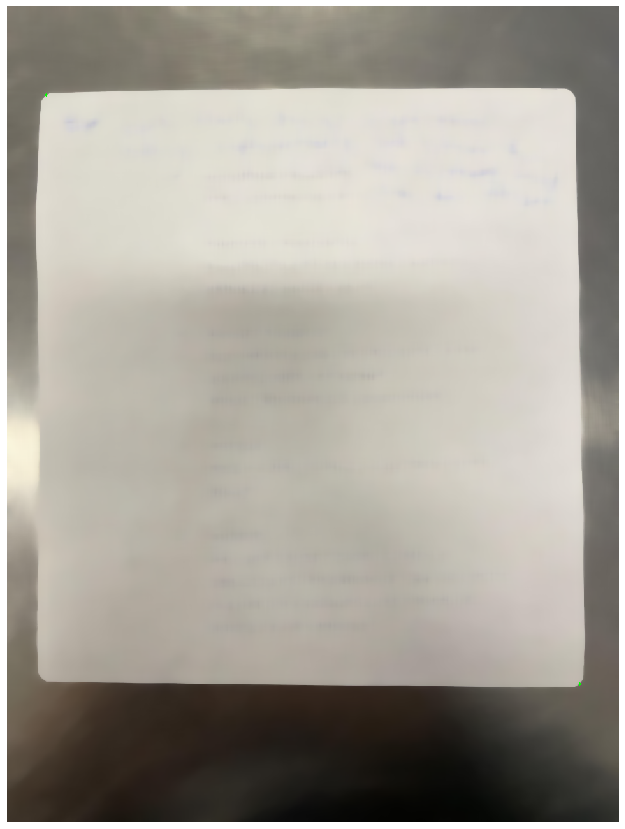

In [121]:
display(cv2.drawContours(blurred, approx, -1, (0,255,0), 3))

In [119]:
import copy

In [123]:
for i in conts:
    print(cv2.contourArea(i,True))

0.0
-2.0
0.0
-1.0
-35.5


In [156]:
lines = cv2.HoughLines(np.uint8(edge_blurred), 1, 2*np.pi / 180, 150, None, 0, 0)

In [157]:
import math
line_image = copy.copy(image)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
        pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
        cv2.line(line_image, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)

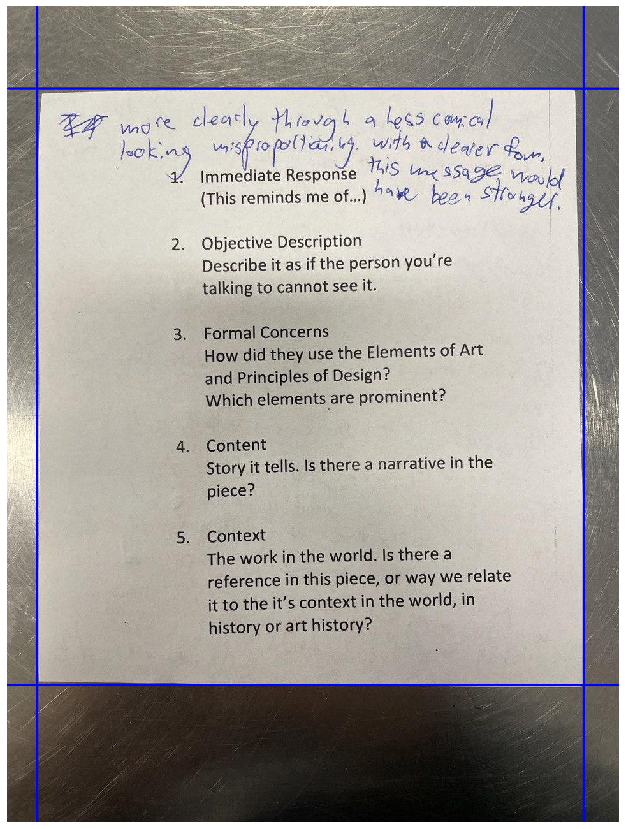

In [158]:
display(line_image)

In [159]:
lines

array([[[ 129.       ,    1.5707964]],

       [[  47.       ,    0.       ]],

       [[ 904.       ,    0.       ]],

       [[1065.       ,    1.5707964]]], dtype=float32)

In [152]:
lines[0][0][0] = 300
lines[1][0][0] = 200

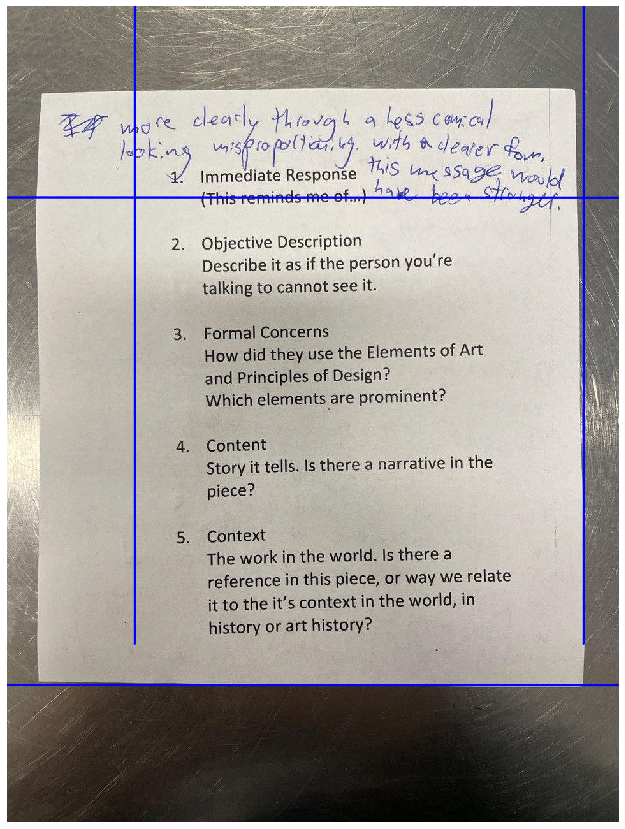

In [153]:
line_image = copy.copy(image)
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(line_image, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)
display(line_image)

In [161]:
if len(lines) == 4:
    print(lines[lines[:, :, 1].argsort()])

[[[[129.          1.5707964]]]


 [[[129.          1.5707964]]]


 [[[129.          1.5707964]]]


 [[[129.          1.5707964]]]]


In [171]:
np.sort(lines, axis=2)

array([[[   1.5707964,  129.       ]],

       [[   0.       ,   47.       ]],

       [[   0.       ,  904.       ]],

       [[   1.5707964, 1065.       ]]], dtype=float32)

In [174]:
slines = np.squeeze(lines)
slines

array([[ 129.       ,    1.5707964],
       [  47.       ,    0.       ],
       [ 904.       ,    0.       ],
       [1065.       ,    1.5707964]], dtype=float32)

In [184]:
slines = slines[slines[:, 1].argsort()]
slines

array([[  47.       ,    0.       ],
       [ 904.       ,    0.       ],
       [ 129.       ,    1.5707964],
       [1065.       ,    1.5707964]], dtype=float32)

In [210]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1
    rho2, theta2 = line2
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [x0, y0]


def segmented_intersections(lines1, lines2):
    """Finds the intersections between groups of lines."""

    intersections = []
    for i in lines1:
        for j in lines2:
            intersections.append(intersection(i, j)) 

    return np.array(intersections).astype(np.float32)

In [211]:
interxs = segmented_intersections(slines[:2], slines[2:])

In [212]:
interxs

array([[  47.,  129.],
       [  47., 1065.],
       [ 904.,  129.],
       [ 904., 1065.]], dtype=float32)

In [213]:
dst_points = np.array([[0,0], [0, 900], [850, 0], [850, 900]]).astype(np.float32)

In [216]:
M = cv2.getPerspectiveTransform(interxs, dst_points)
M

array([[ 9.91831972e-01,  8.80059522e-18, -4.66161027e+01],
       [ 0.00000000e+00,  9.61538462e-01, -1.24038462e+02],
       [-5.52736473e-20,  5.05491094e-37,  1.00000000e+00]])

In [222]:
warped_image_size = np.array([850, 900])

In [223]:
warped = cv2.warpPerspective(image, M, warped_image_size)
warped

array([[[129, 125, 114],
        [117, 113, 102],
        [117, 113, 102],
        ...,
        [107, 106, 102],
        [ 87,  86,  82],
        [ 87,  86,  82]],

       [[113, 109,  98],
        [114, 110,  99],
        [116, 112, 101],
        ...,
        [102, 101,  97],
        [ 98,  97,  93],
        [ 98,  97,  93]],

       [[106, 102,  91],
        [107, 103,  92],
        [109, 105,  94],
        ...,
        [ 91,  90,  86],
        [104, 103,  99],
        [109, 108, 104]],

       ...,

       [[115, 103,  87],
        [103,  94,  79],
        [117, 107,  93],
        ...,
        [188, 184, 173],
        [204, 200, 189],
        [131, 127, 116]],

       [[113, 101,  85],
        [117, 106,  92],
        [125, 113,  99],
        ...,
        [187, 183, 172],
        [199, 195, 184],
        [119, 115, 104]],

       [[110,  98,  82],
        [115, 103,  89],
        [112, 100,  86],
        ...,
        [166, 162, 151],
        [207, 203, 192],
        [110, 106,  95]]

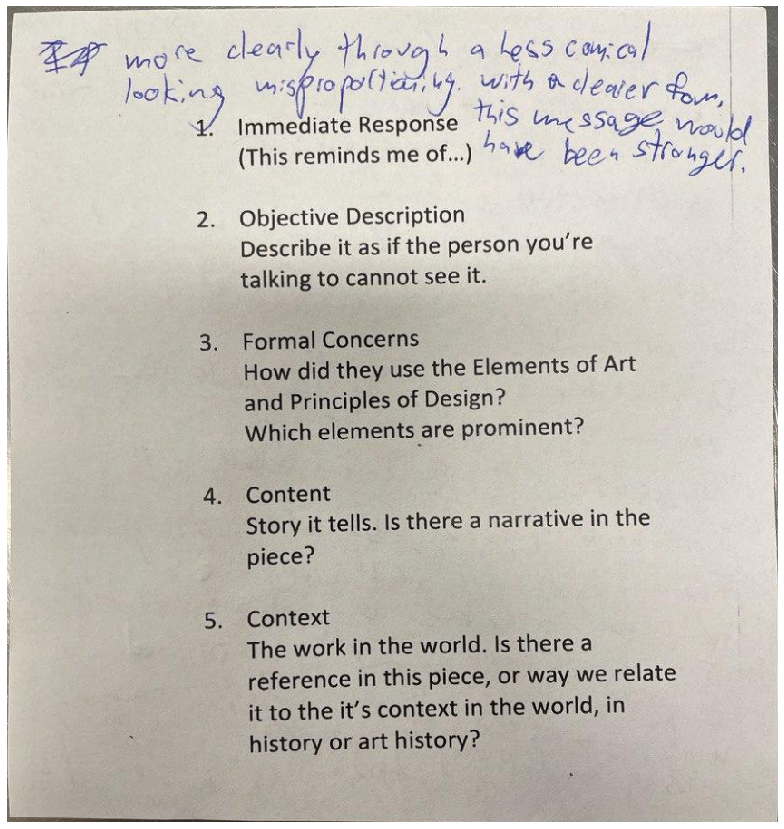

In [224]:
display(warped)